# FDTD tidy3d

[tidy3D](https://docs.flexcompute.com/projects/tidy3d/en/latest/) is a fast GPU based FDTD tool developed by flexcompute.

To run, you need to [create an account](https://simulation.cloud/) and add credits. The number of credits that each simulation takes depends on the simulation computation time.

![cloud_model](https://i.imgur.com/5VTCPLR.png)

## Materials

Tidy3d provides you with a material database of dispersive materials.

In [1]:
# basic ipython configuration (reload source code automatically and plots inline)
from gdsfactory.components.taper import taper_sc_nc
import gdsfactory.simulation as sim
import gdsfactory.simulation.gtidy3d as gt
import gdsfactory as gf
from tidy3d import web
import tidy3d as td
import matplotlib.pyplot as plt
import numpy as np

gf.config.rich_output()
PDK = gf.generic_tech.get_generic_pdk()
PDK.activate()

%load_ext autoreload
%autoreload 2
%matplotlib inline

2023-02-20 17:59:11.752 | INFO     | gdsfactory.config:<module>:50 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 6.43.1


[17:59:13] INFO     Using client version: 1.8.4                                                     ]8;id=360896;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/__init__.py\__init__.py]8;;\:]8;id=742203;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/__init__.py#120\120]8;;\

2023-02-20 17:59:13.780 | INFO     | gdsfactory.simulation.gtidy3d:<module>:54 - Tidy3d '1.8.4' installed at ['/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d']


2023-02-20 17:59:13.888 | INFO     | gdsfactory.technology.layer_views:__init__:785 - Importing LayerViews from YAML file: /home/runner/work/gdsfactory/gdsfactory/gdsfactory/generic_tech/layer_views.yaml.


2023-02-20 17:59:13.895 | INFO     | gdsfactory.pdk:activate:206 - 'generic' PDK is now active


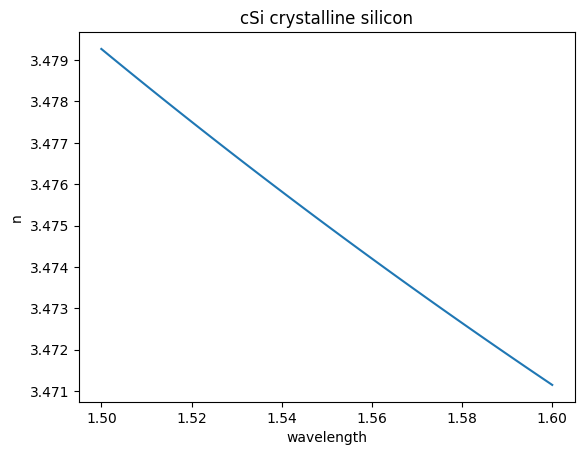

In [2]:
nm = 1e-3
wavelength = np.linspace(1500, 1600) * nm
f = td.C_0 / wavelength
eps_complex = td.material_library["cSi"]["Li1993_293K"].eps_model(f)
n, k = td.Medium.eps_complex_to_nk(eps_complex)
plt.plot(wavelength, n)
plt.title("cSi crystalline silicon")
plt.xlabel("wavelength")
plt.ylabel("n")

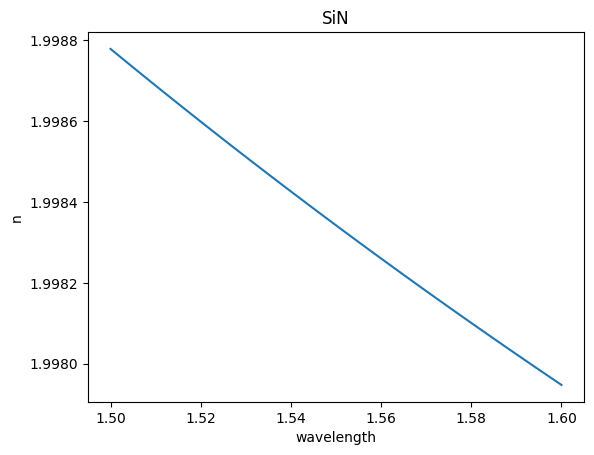

In [3]:
eps_complex = td.material_library["Si3N4"]["Luke2015PMLStable"].eps_model(f)
n, k = td.Medium.eps_complex_to_nk(eps_complex)
plt.plot(wavelength, n)
plt.title("SiN")
plt.xlabel("wavelength")
plt.ylabel("n")

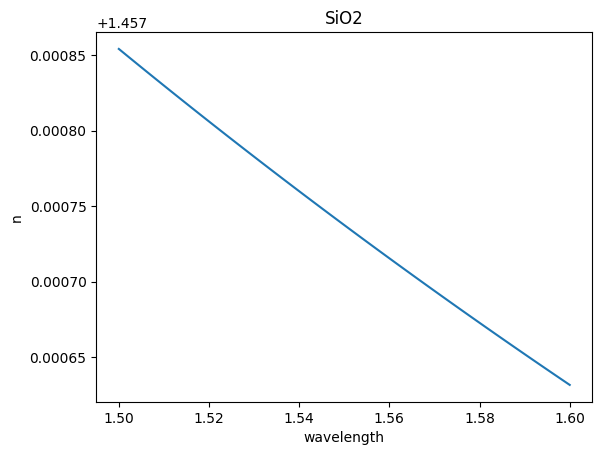

In [4]:
eps_complex = td.material_library["SiO2"]["Horiba"].eps_model(f)
n, k = td.Medium.eps_complex_to_nk(eps_complex)
plt.plot(wavelength, n)
plt.title("SiO2")
plt.xlabel("wavelength")
plt.ylabel("n")

## get_simulation

You can run `get_simulation` to convert a gdsfactory planar Component into a tidy3d simulation and make sure the simulation looks correct before running it

`get_simulation` also has a `plot_modes` option so you can make sure you are monitoring the desired mode.

### 2D

2D planar simulations run faster than 3D. When running in 2D we don't consider the component thickness in the z dimension

[17:59:14] WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=960602;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=64198;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#373\373]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

           WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=411442;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=373503;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#373\373]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

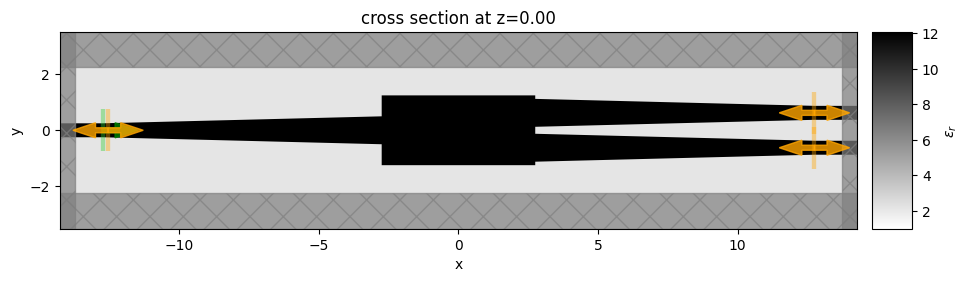

In [5]:
c = gf.components.mmi1x2()
s = gt.get_simulation(c, is_3d=False)
fig = gt.plot_simulation(s)

### 3D

By default all simulations run in 3D unless indicated otherwise with the `is_3d` argument.
3D simulations still run quite fast thanks to the GPU solver on the server side.

In [6]:
help(gt.get_simulation)

Help on cython_function_or_method in module gdsfactory.simulation.gtidy3d.get_simulation:

get_simulation(component: 'ComponentSpec', port_extension: 'Optional[float]' = 4.0, layer_stack: 'Optional[LayerStack]' = None, thickness_pml: 'float' = 1.0, xmargin: 'float' = 0, ymargin: 'float' = 0, xmargin_left: 'float' = 0, xmargin_right: 'float' = 0, ymargin_top: 'float' = 0, ymargin_bot: 'float' = 0, zmargin: 'float' = 1.0, clad_material: 'str' = 'sio2', port_source_name: 'str' = 'o1', port_margin: 'float' = 0.5, port_source_offset: 'float' = 0.1, distance_source_to_monitors: 'float' = 0.2, wavelength_start: 'float' = 1.5, wavelength_stop: 'float' = 1.6, wavelength_points: 'int' = 50, plot_modes: 'bool' = False, num_modes: 'int' = 2, run_time_ps: 'float' = 10.0, material_name_to_tidy3d: 'Optional[Dict[str, str]]' = None, is_3d: 'bool' = True, with_all_monitors: 'bool' = False, boundary_spec: 'Optional[td.BoundarySpec]' = None, grid_spec: 'Optional[td.GridSpec]' = None, sidewall_angle_deg: 

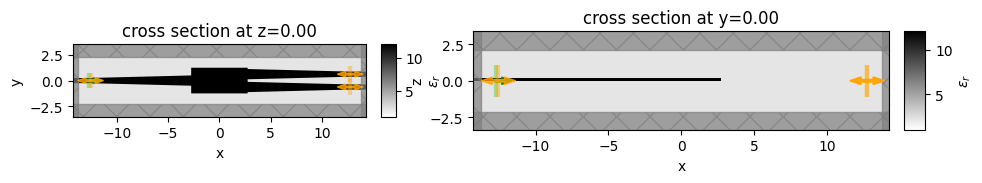

In [7]:
c = gf.components.mmi1x2()
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)

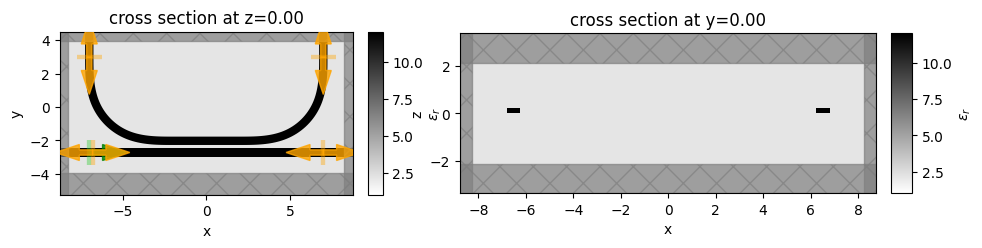

In [8]:
c = gf.components.coupler_ring()
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)

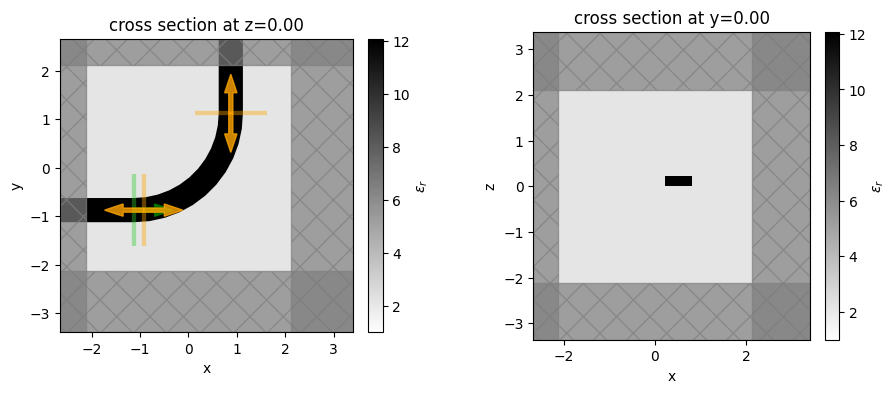

In [9]:
c = gf.components.bend_circular(radius=2)
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)

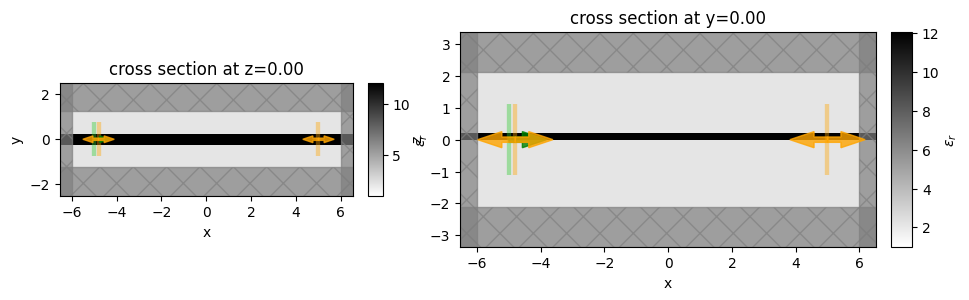

In [10]:
c = gf.components.straight()
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)

## Sidewall angle

You can define the sidewall angle in degrees with respect to normal. Lets exaggerate the sidewall angle so we can clearly see it.

[17:59:16] WARNING  'reference_plane' field uses default value, which is 'bottom' but will change  ]8;id=901787;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/geometry.py\geometry.py]8;;\:]8;id=75242;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/geometry.py#2034\2034]8;;\
                    to 'middle' in Tidy3D version 2.0. We recommend you change your classmethod                    
                    constructor call to explicitly set the 'reference_plane' field ahead of this                   
                    release to avoid unexpected results.                                                           

Effective index of computed modes:  [[1.6876124 1.5066847]]


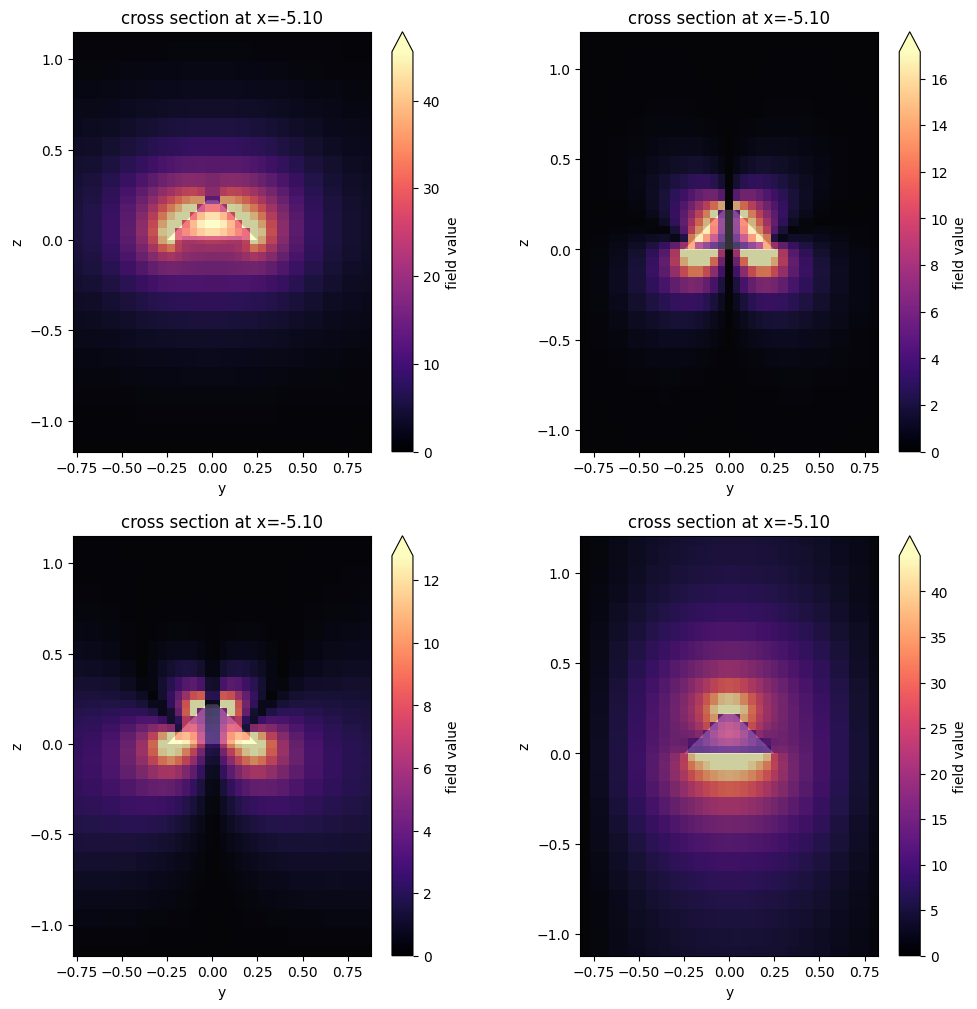

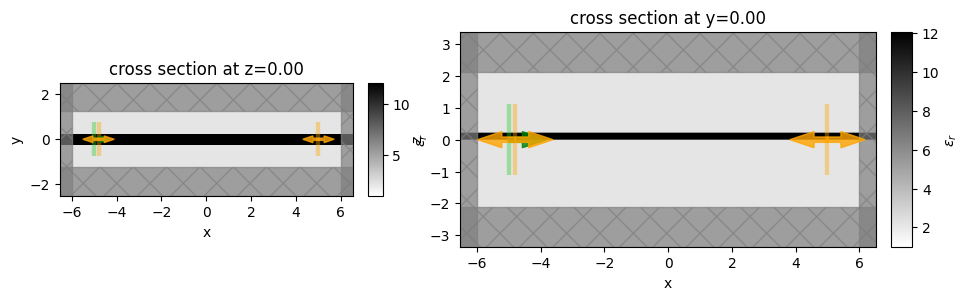

In [11]:
c = gf.components.straight()
s = gt.get_simulation(c, sidewall_angle_deg=45, plot_modes=True)
fig = gt.plot_simulation(s)

## Erosion / dilation

[17:59:18] WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=684940;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=714990;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#373\373]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

           WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=886375;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=80261;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#373\373]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

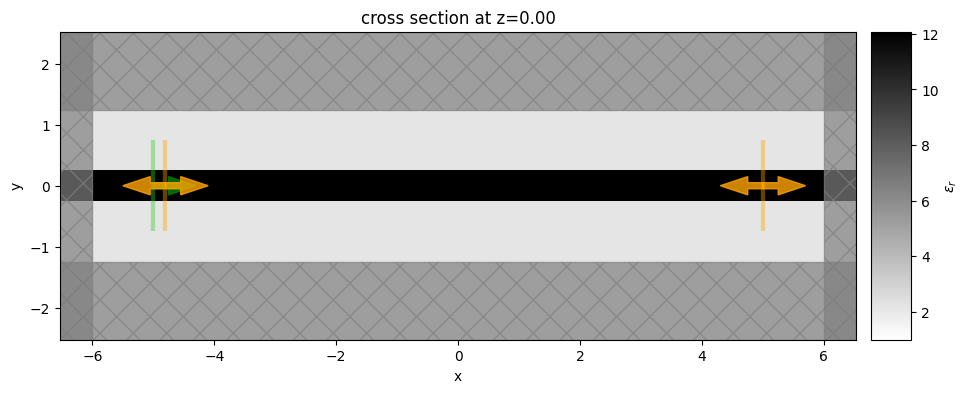

In [12]:
c = gf.components.straight()
s = gt.get_simulation(c, is_3d=False, dilation=0)
fig = gt.plot_simulation(s)

           WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=626717;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=874217;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#373\373]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

           WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=484171;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=209910;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#373\373]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

           WARNING  Structure at structures[1] was detected as being less than half of a central  ]8;id=331334;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=439003;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#399\399]8;;\
                    wavelength from a PML on side y-min. To avoid inaccurate results, please                       
                    increase gap between any structures and PML or fully extend structure through                  
                    the pml.                                                                                       

           WARNING  Structure at structures[1] was detected as being less than half of a central  ]8;id=692713;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=733452;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#399\399]8;;\
                    wavelength from a PML on side y-max. To avoid inaccurate results, please                       
                    increase gap between any structures and PML or fully extend structure through                  
                    the pml.                                                                                       

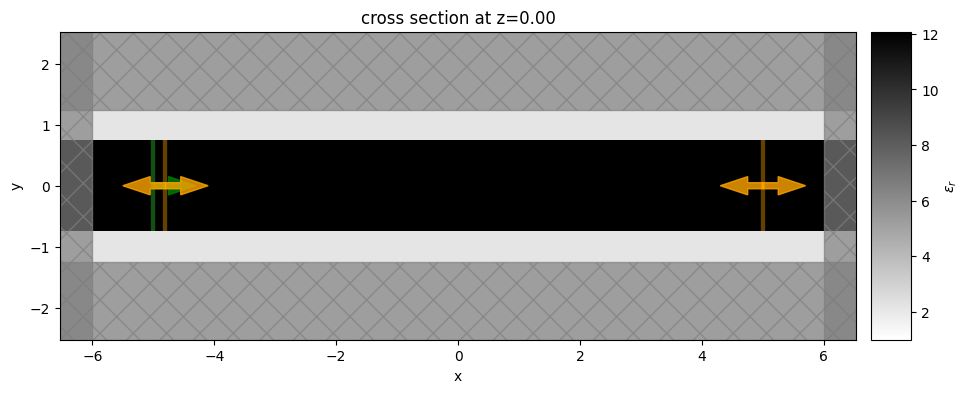

In [13]:
c = gf.components.straight()
s = gt.get_simulation(c, is_3d=False, dilation=0.5)
fig = gt.plot_simulation(s)

In [14]:
0.5 * 1.5

0.75

A `dilation = 0.5` makes a 0.5um waveguide 0.75um

In [15]:
0.5 * 0.8

0.4

A `dilation = -0.2` makes a 0.5um eroded down to 0.1um

In [16]:
0.2 * 0.5

0.1

[17:59:19] WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=288102;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=411135;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#373\373]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

           WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=509791;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=192379;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#373\373]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

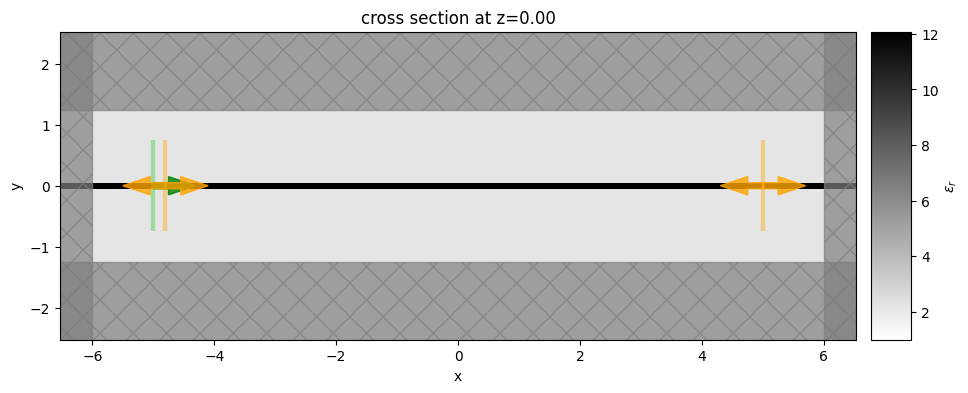

In [17]:
c = gf.components.straight()
s = gt.get_simulation(c, is_3d=False, dilation=-0.2)
fig = gt.plot_simulation(s)

## Plot source and monitor modes

Effective index of computed modes:  [[2.5181067 1.8349748]]


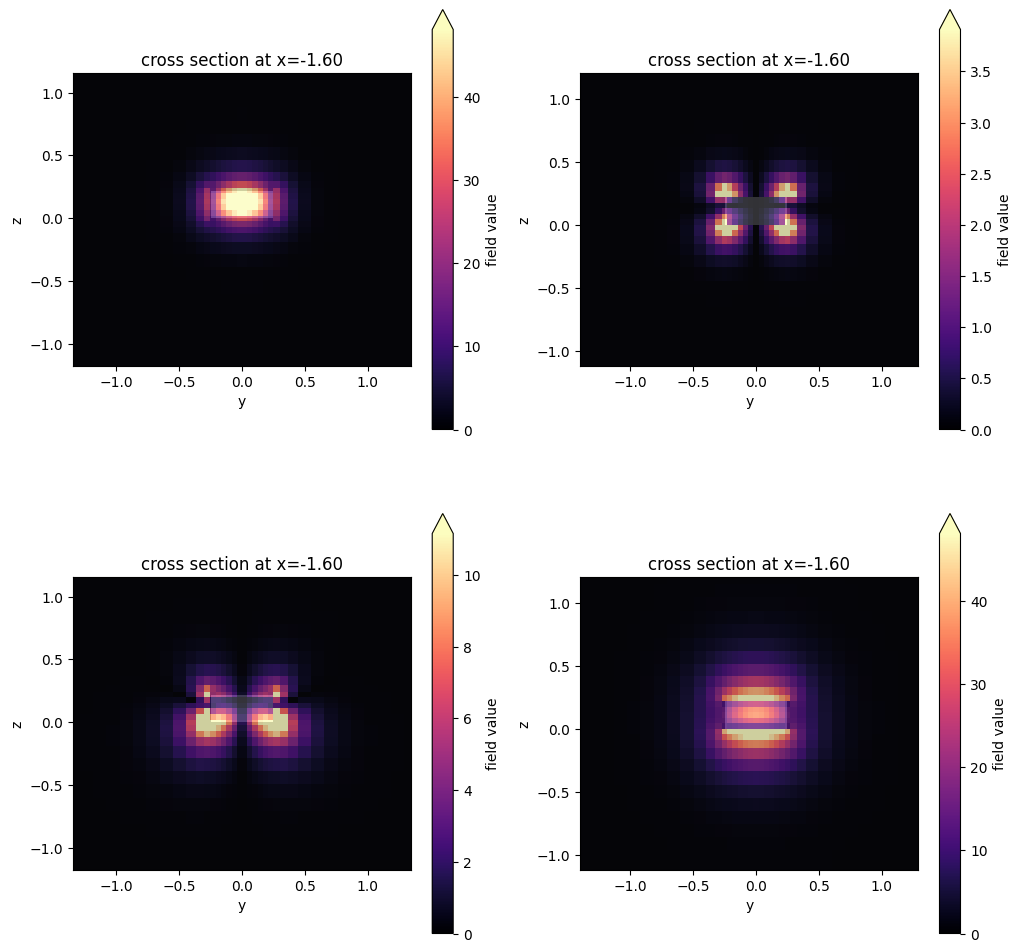

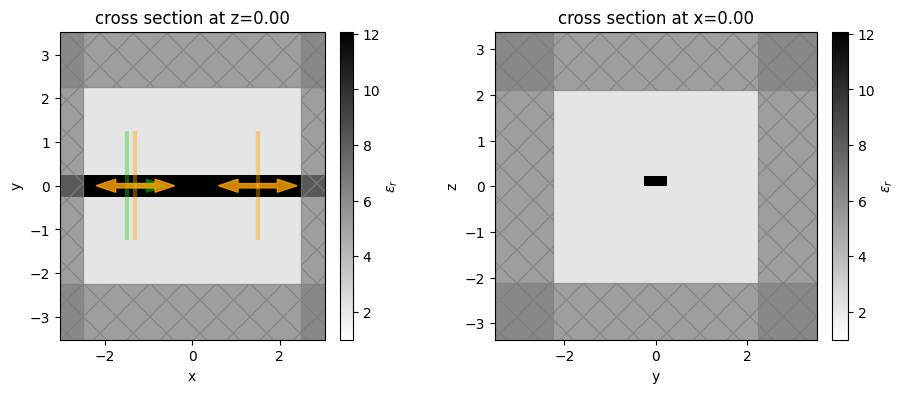

In [18]:
c = gf.components.straight(length=3)
s = gt.get_simulation(c, plot_modes=True, port_margin=1, ymargin=1)
fig = gt.plot_simulation_xz(s)

[17:59:21] WARNING  Mode field at frequency index 0, mode index 1 does not decay at the plane    ]8;id=949069;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/plugins/mode/mode_solver.py\mode_solver.py]8;;\:]8;id=499313;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/plugins/mode/mode_solver.py#354\354]8;;\
                    boundaries.                                                                                    

Effective index of computed modes:  [[2.5986178 2.1542506]]


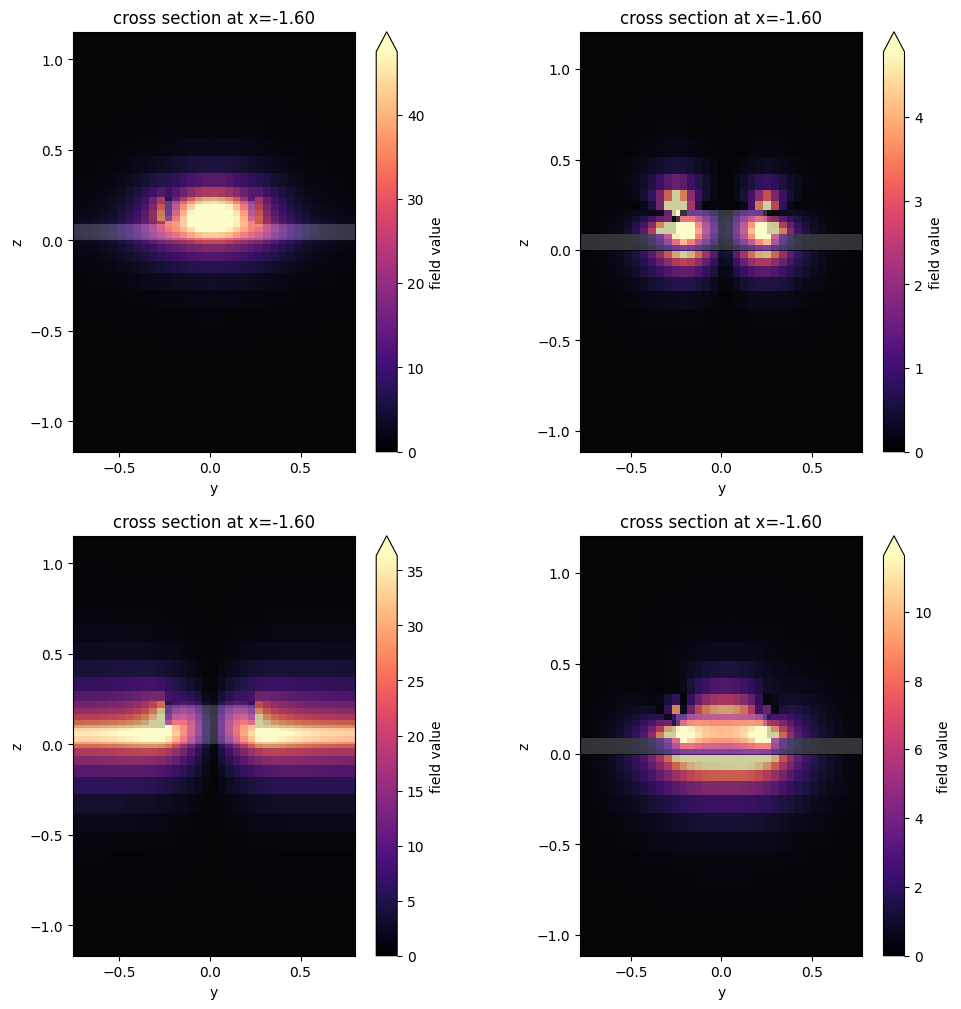

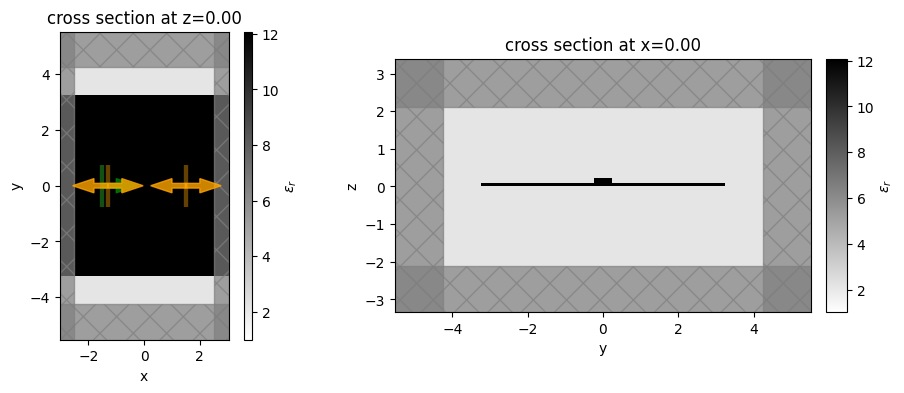

In [19]:
c = gf.components.straight_rib(length=3)
s = gt.get_simulation(c, plot_modes=True)
fig = gt.plot_simulation_xz(s)

Effective index of computed modes:  [[2.4733884 1.8082747]]


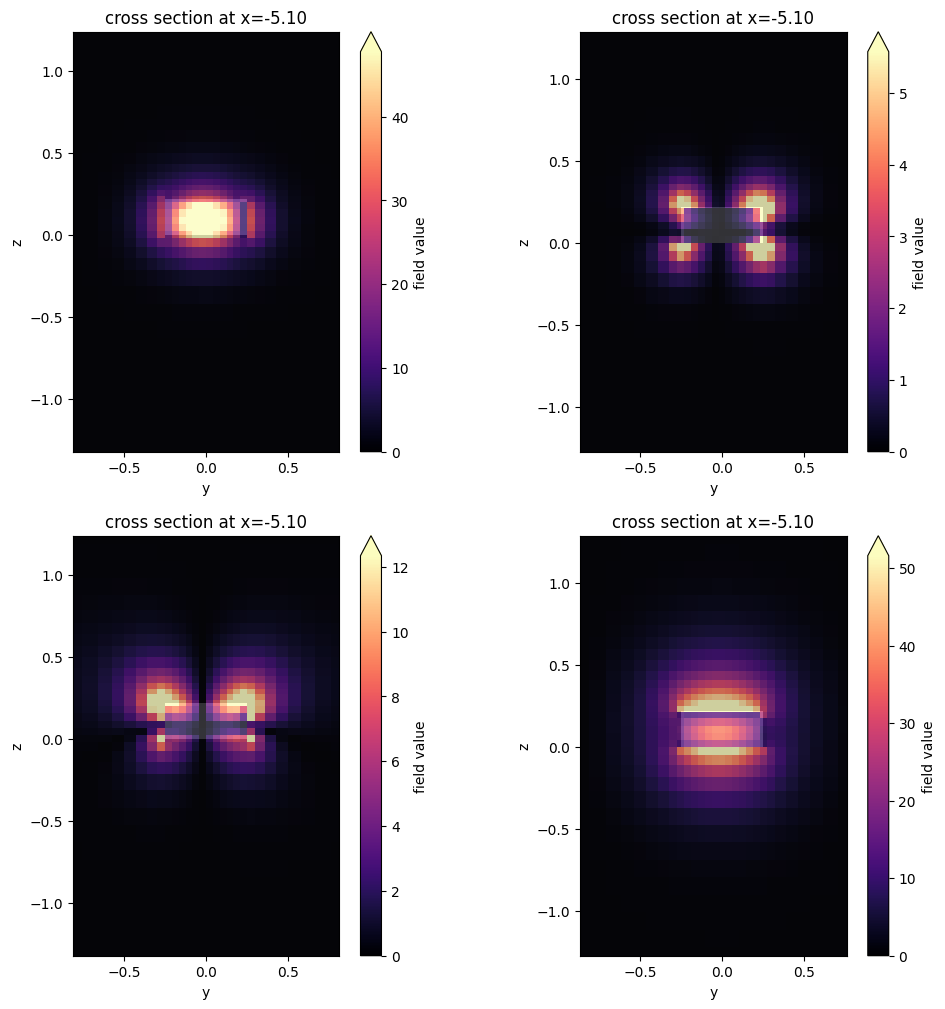

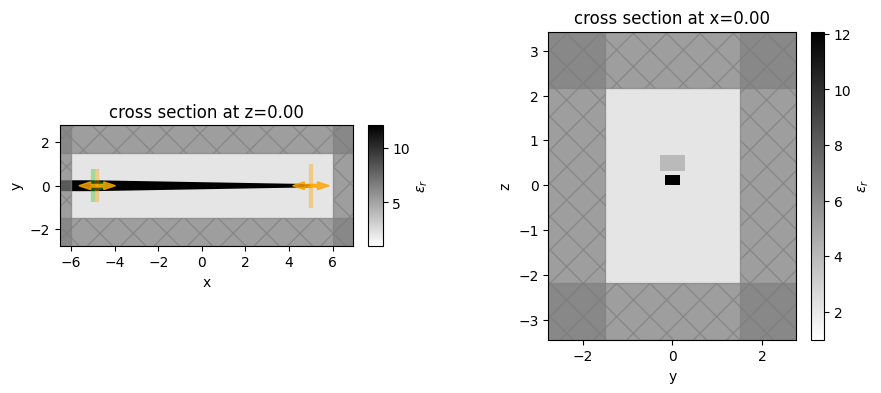

In [20]:
c = taper_sc_nc(length=10)
s = gt.get_simulation(c, plot_modes=True)
fig = gt.plot_simulation_xz(s)

Lets make sure the mode also looks correct on the Nitride side

[17:59:24] WARNING  Mode field at frequency index 0, mode index 1 does not decay at the plane    ]8;id=443915;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/plugins/mode/mode_solver.py\mode_solver.py]8;;\:]8;id=121382;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/plugins/mode/mode_solver.py#354\354]8;;\
                    boundaries.                                                                                    

Effective index of computed modes:  [[1.6062695 1.5467131]]


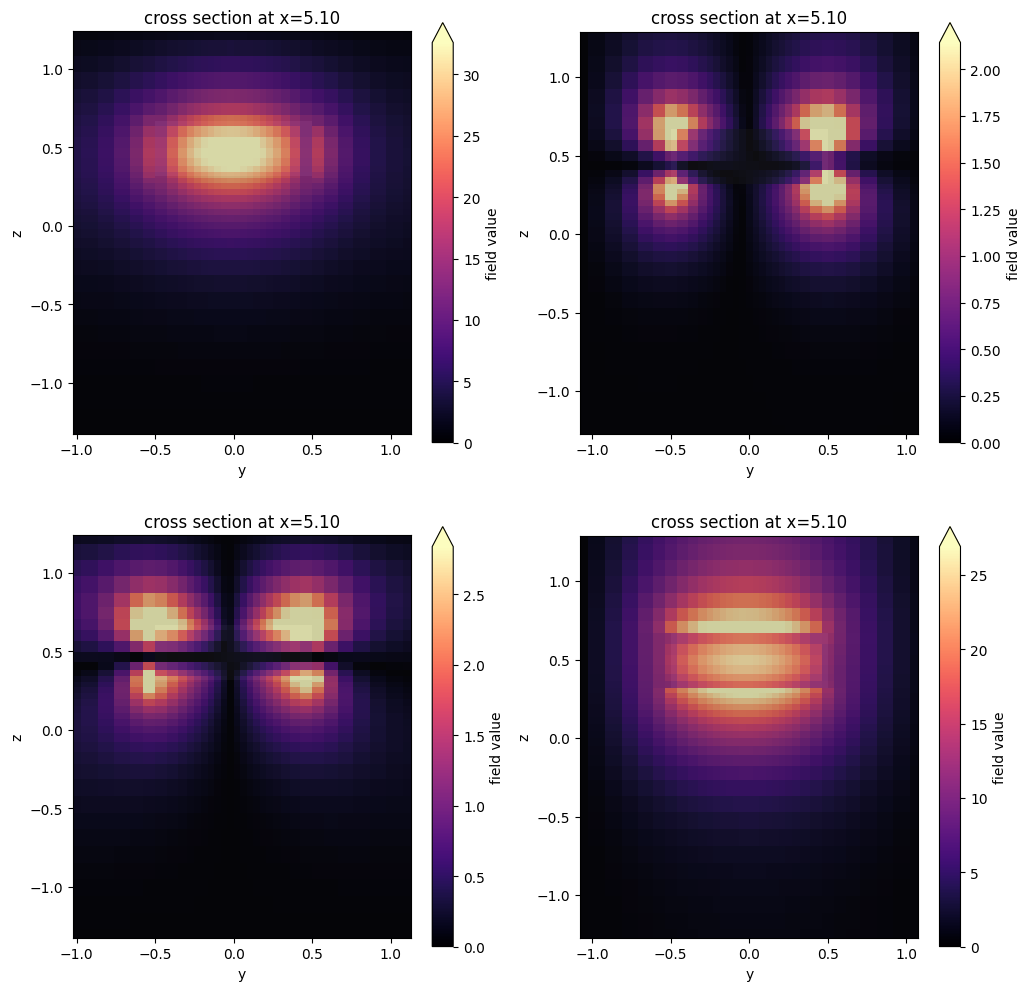

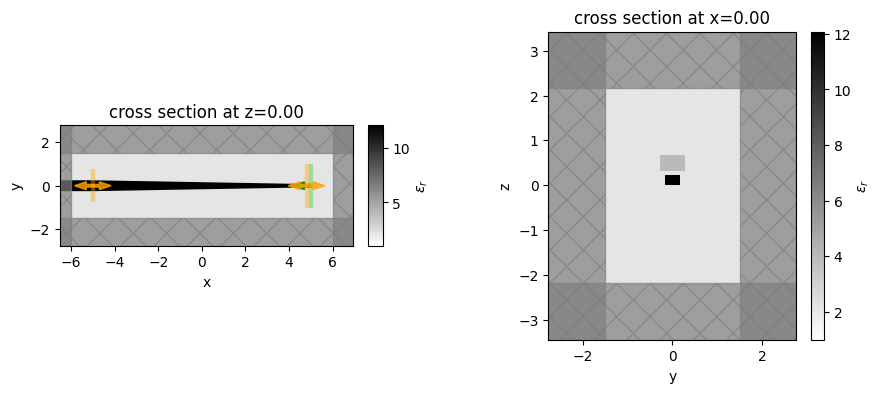

In [21]:
c = taper_sc_nc(length=10)
s = gt.get_simulation(c, port_source_name="o2", plot_modes=True)
fig = gt.plot_simulation_xz(s)

bend_euler


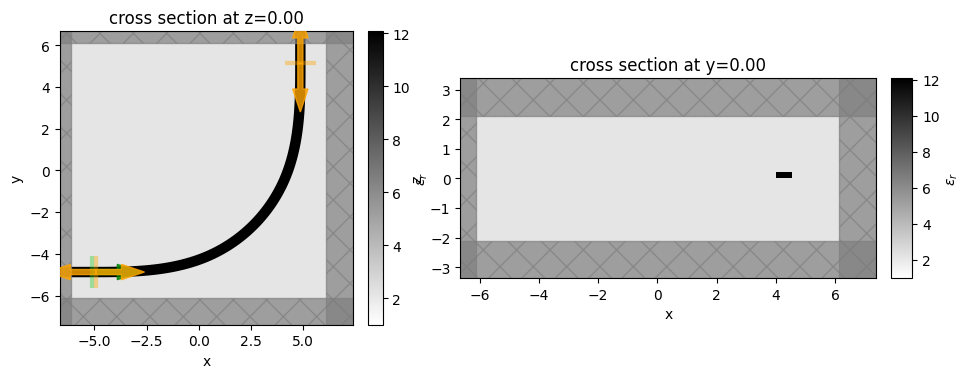

bend_s


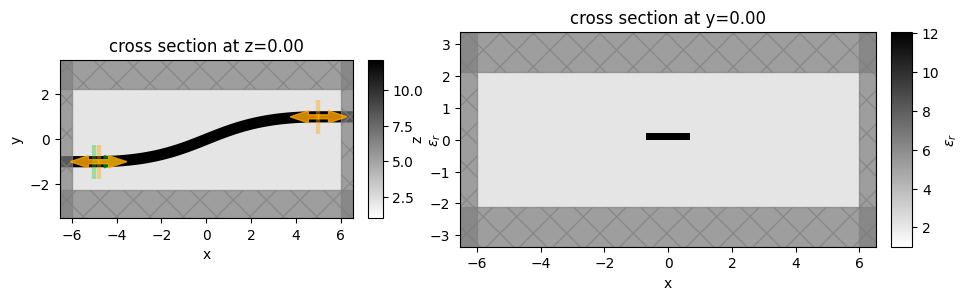

coupler


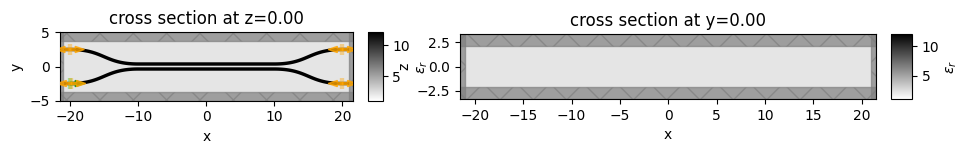

coupler_ring


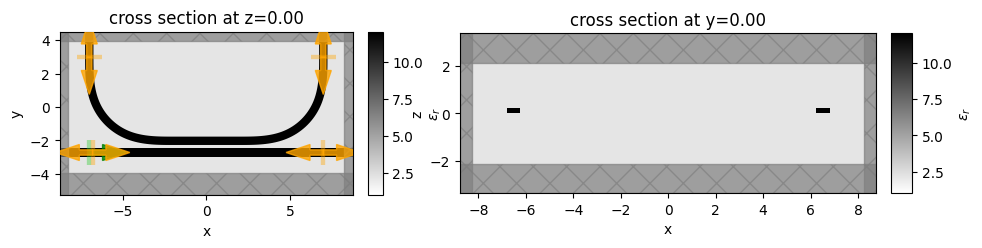

crossing


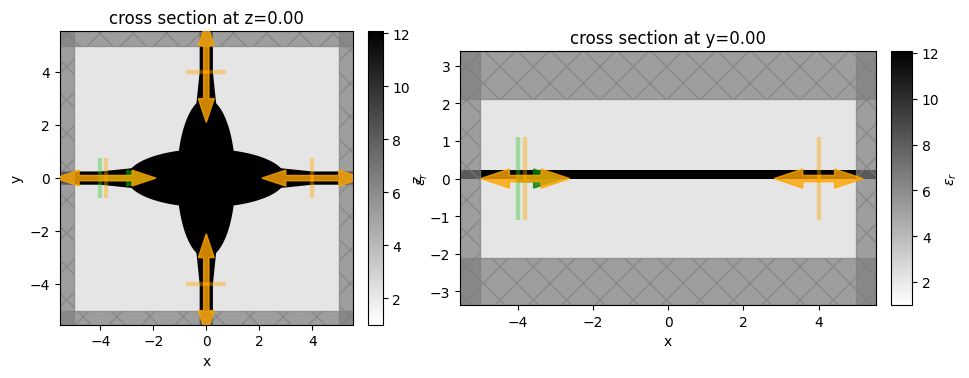

mmi1x2


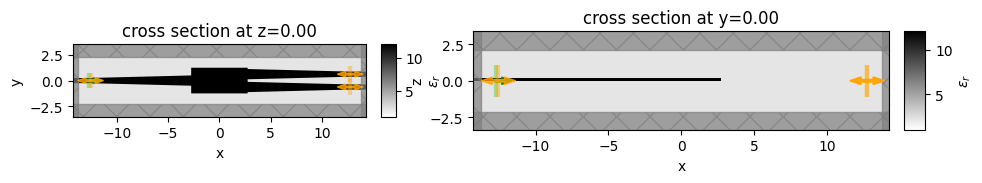

mmi2x2


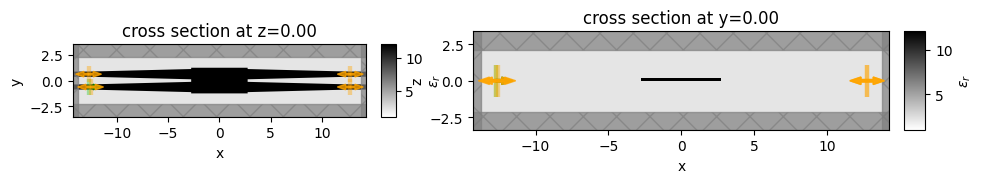

taper


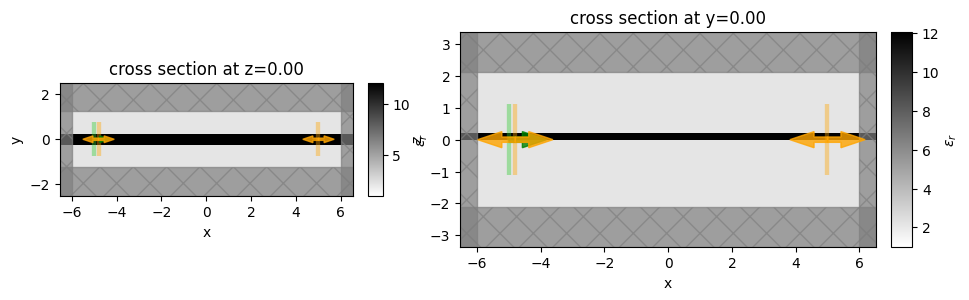

straight


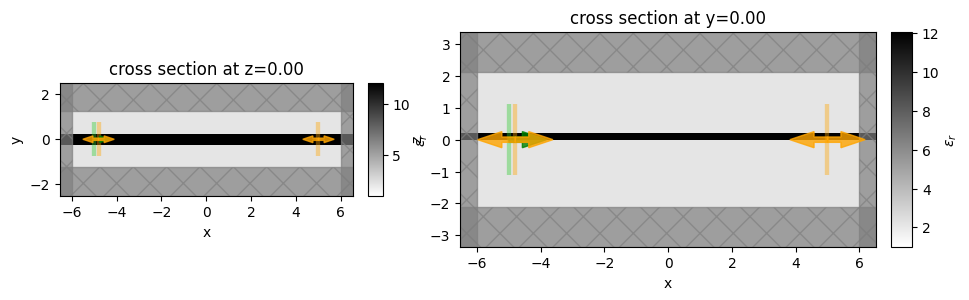

In [22]:
components = [
    "bend_euler",
    "bend_s",
    "coupler",
    "coupler_ring",
    "crossing",
    "mmi1x2",
    "mmi2x2",
    "taper",
    "straight",
]

for component_name in components:
    print(component_name)
    plt.figure()
    c = gf.components.cells[component_name]()
    s = gt.get_simulation(c)
    fig = gt.plot_simulation(s)

## write_sparameters

You can write Sparameters from a simulation as well as a group of simulations in parallel.

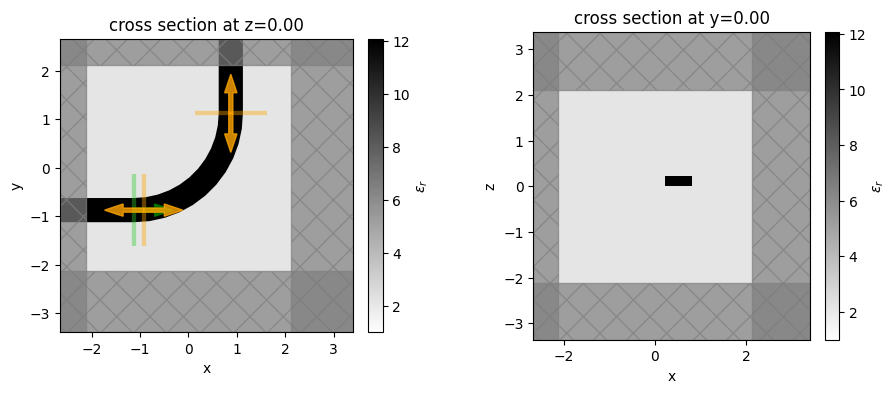

In [23]:
c = gf.components.bend_circular(radius=2)
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)

For a 2 port reciprocal passive component you can always assume `s21 = s12`

Another approximation you can make for planar devices is that `s11 = s22`, which saves 1 extra simulation.
This approximation only works well for straight and bends.
We call this `1x1` port symmetry

2023-02-20 17:59:30.774 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters:write_sparameters:163 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/bend_circular_radius2_c3ff7345.npz')


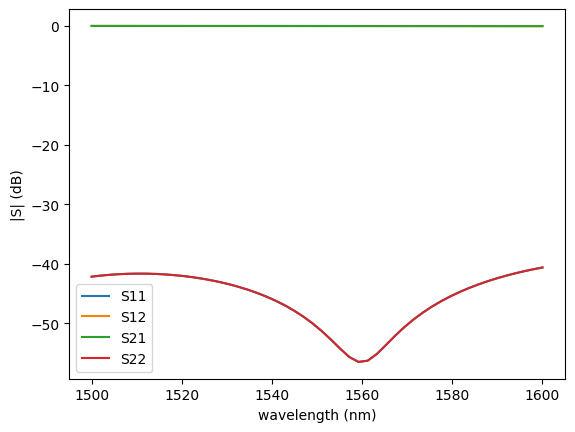

In [24]:
df = gt.write_sparameters_1x1(c)
sim.plot.plot_sparameters(df)

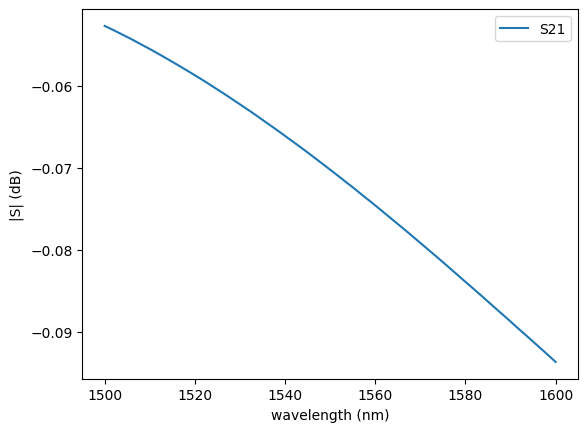

In [25]:
sim.plot.plot_sparameters(df, keys=("o2@0,o1@0",))

Effective index of computed modes:  [[2.4408169 1.7787054]]


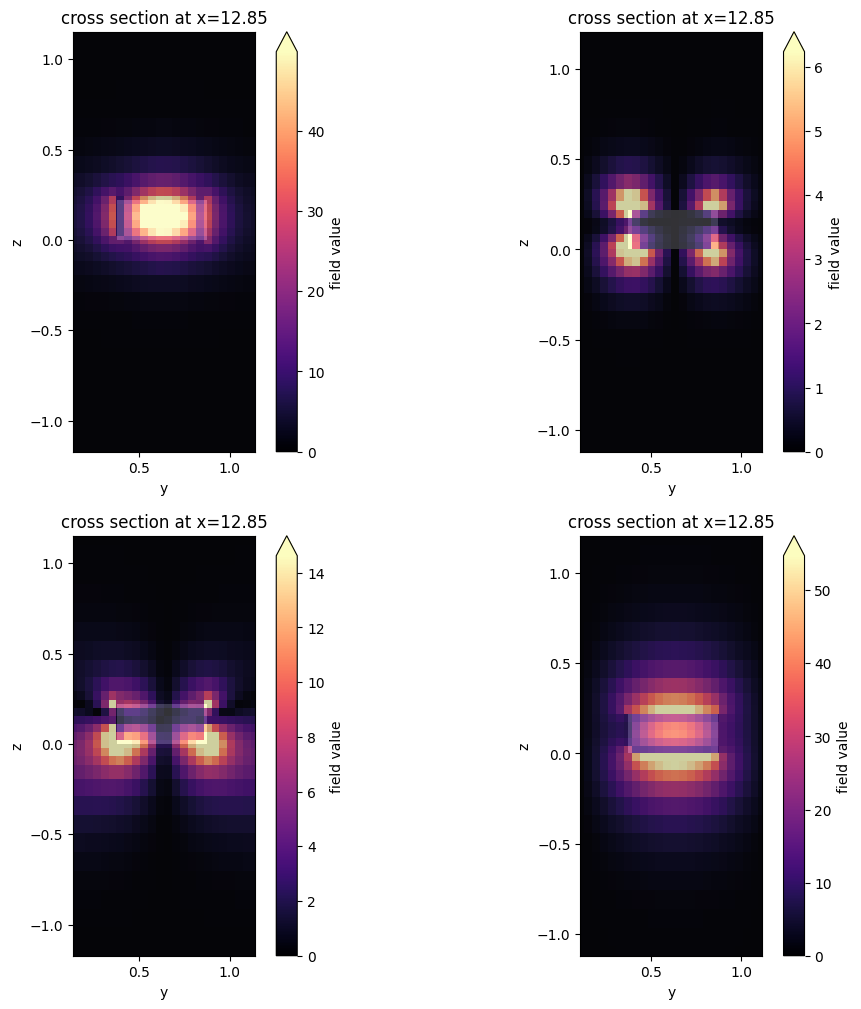

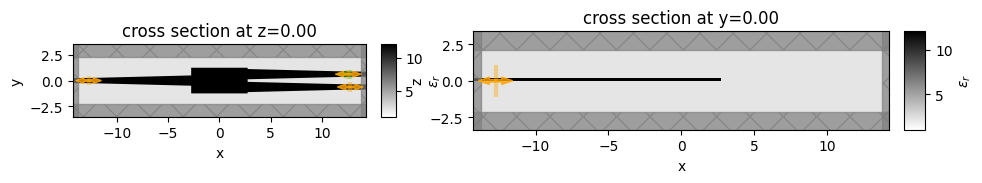

In [26]:
c = gf.components.mmi1x2()
s = gt.get_simulation(c, plot_modes=True, port_margin=0.2, port_source_name="o2")
fig = gt.plot_simulation(s, y=0)  # see input

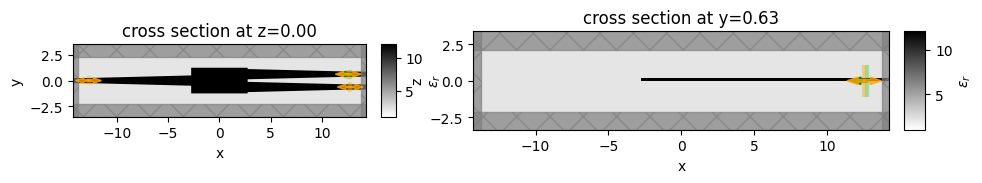

In [27]:
fig = gt.plot_simulation(s, y=0.63)  # see output

In [28]:
# df = gt.write_sparameters(c, wavelength_start=1.5, wavelength_stop=1.6, grid_spec=td.GridSpec.uniform(dl=50*nm))
# df = gt.write_sparameters(c)
# df = gt.write_sparameters(c, wavelength_start=1.520, wavelength_stop=1.580, port_margin=0.6, ymargin=2)
# df = gt.write_sparameters(c, wavelength_start=1.520, wavelength_stop=1.580, port_margin=0.9)
df = gt.write_sparameters(c)

2023-02-20 17:59:33.146 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters:write_sparameters:163 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/mmi1x2_c3ff7345.npz')


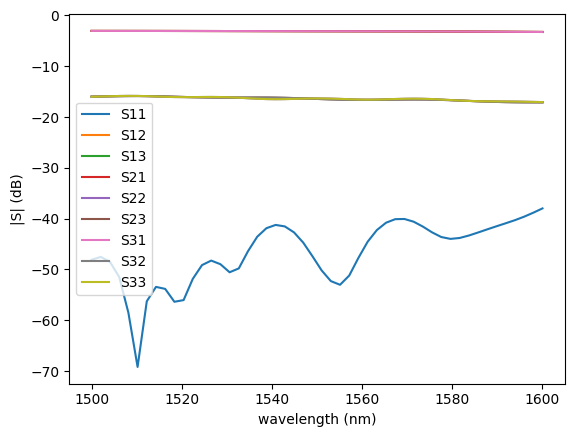

In [29]:
sim.plot.plot_sparameters(df)

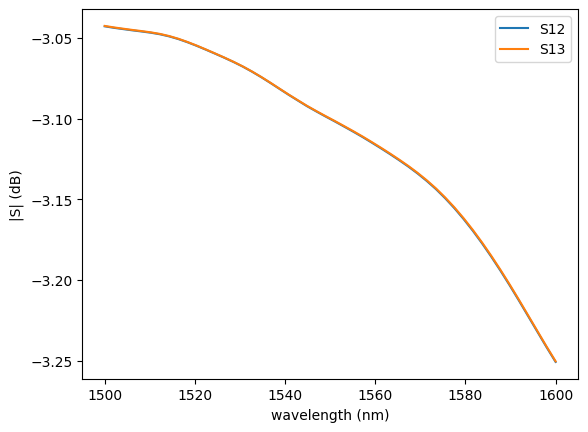

In [30]:
sim.plot.plot_sparameters(df, keys=("o1@0,o2@0", "o1@0,o3@0"))

## write_sparameters_batch

You can also send a batch of component simulations in parallel to the tidy3d server.

In [31]:
jobs = [dict(component=gf.c.straight(length=1.11 + i)) for i in [1, 2]]
dfs = gt.write_sparameters_batch_1x1(jobs)

2023-02-20 17:59:33.542 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters:write_sparameters:163 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/straight_length2p110000_b5b2ce7b_c3ff7345.npz')


2023-02-20 17:59:33.544 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters:write_sparameters:163 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/straight_length3p110000_e3d7b292_c3ff7345.npz')


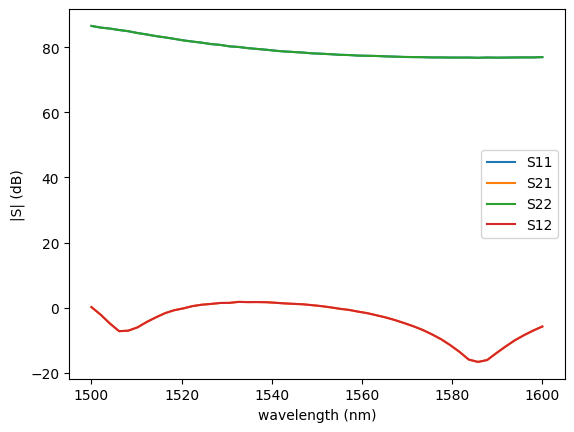

In [32]:
df1 = dfs[0]
sim.plot.plot_sparameters(df1)

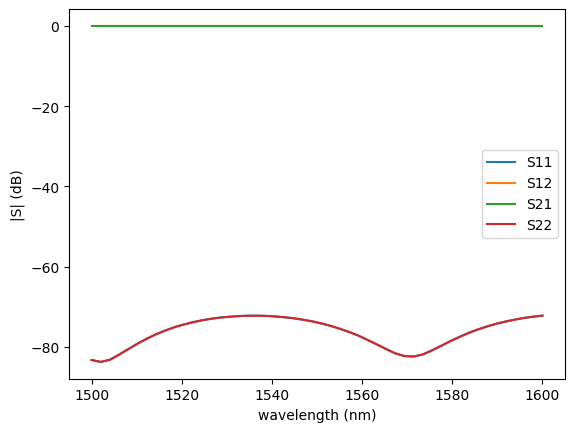

In [33]:
df2 = dfs[1]
sim.plot.plot_sparameters(df2)

## get_simulation_grating_coupler

You can also expand the planar component simulations to simulate an out-of-plane grating coupler.

The following simulations run in 2D but can also run in 3D.

In [34]:
help(gt.get_simulation_grating_coupler)

Help on function get_simulation_grating_coupler in module gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:

get_simulation_grating_coupler(component: 'Component', port_extension: 'Optional[float]' = 15.0, layer_stack: 'Optional[LayerStack]' = None, thickness_pml: 'float' = 1.0, xmargin: 'float' = 0, ymargin: 'float' = 0, xmargin_left: 'float' = 0, xmargin_right: 'float' = 0, ymargin_top: 'float' = 0, ymargin_bot: 'float' = 0, zmargin: 'float' = 1.0, clad_material: 'str' = 'sio2', box_material: 'str' = 'sio2', box_thickness: 'float' = 2.0, substrate_material: 'str' = 'si', port_waveguide_name: 'str' = 'o1', port_margin: 'float' = 0.5, port_waveguide_offset: 'float' = 0.1, wavelength: 'Optional[float]' = 1.55, wavelength_start: 'float' = 1.2, wavelength_stop: 'float' = 1.8, wavelength_points: 'int' = 256, plot_modes: 'bool' = False, num_modes: 'int' = 2, run_time_ps: 'float' = 10.0, fiber_port_prefix: 'str' = 'opt', fiber_xoffset: 'float' = 0, fiber_z: 'float' = 2, fiber_mfd

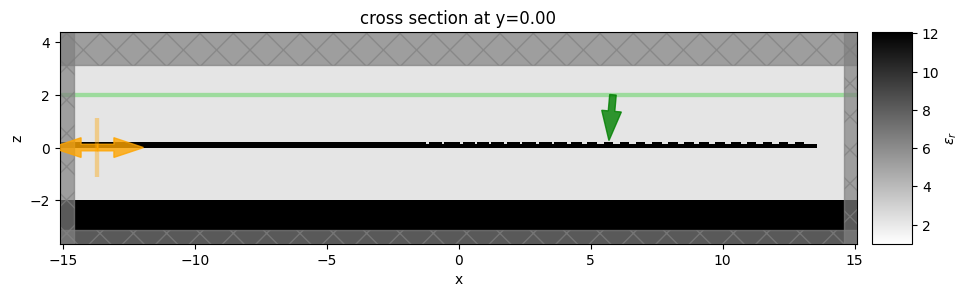

In [35]:
c = (
    gf.components.grating_coupler_elliptical_lumerical()
)  # inverse design grating apodized
fiber_angle_deg = 5
s = gt.get_simulation_grating_coupler(
    c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=0
)
f = gt.plot_simulation(s)

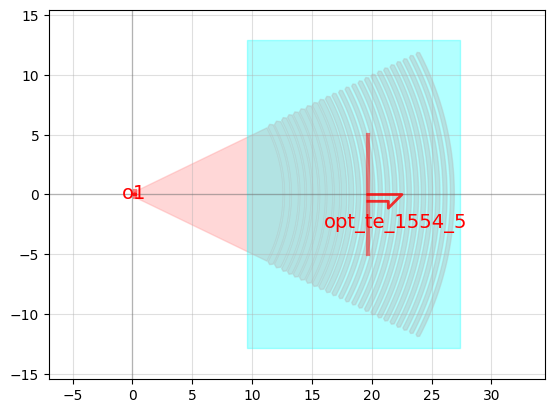

In [36]:
f = c.plot()

Lets compare the xtolerance of a constant pitch vs an apodized grating.

We run simulations in 2D for faster.

Lets simulate 2 different grating couplers:

- apodized inverse design example from lumerical website (5 degrees fiber angle)
- constant pitch grating from gdsfactory generic PDK (20 degrees fiber angle)

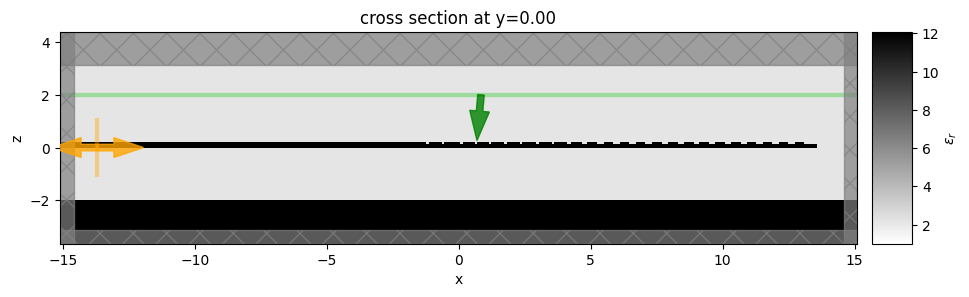

In [37]:
sim = gt.get_simulation_grating_coupler(
    c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=-5
)
f = gt.plot_simulation(sim)

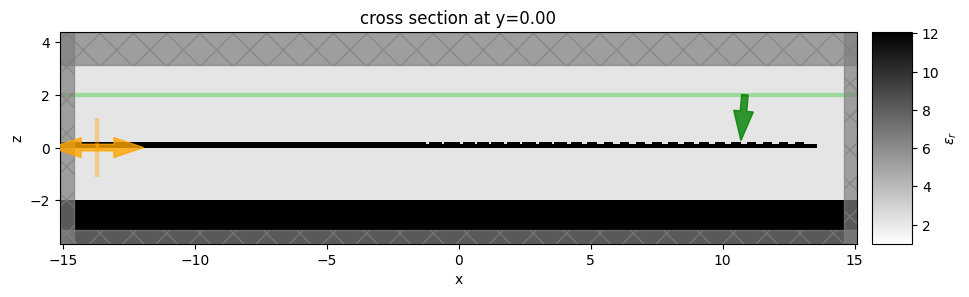

In [38]:
sim = gt.get_simulation_grating_coupler(
    c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=+5
)
f = gt.plot_simulation(sim)

In [39]:
offsets = np.arange(-5, 6, 5)

In [40]:
dfs = [
    gt.write_sparameters_grating_coupler(
        component=c,
        is_3d=False,
        fiber_angle_deg=fiber_angle_deg,
        fiber_xoffset=fiber_xoffset,
    )
    for fiber_xoffset in offsets
]

2023-02-20 17:59:35.097 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:100 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/grating_coupler_ellipti_9d85a0c6_1aa2deeb.npz')


2023-02-20 17:59:35.100 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:100 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/grating_coupler_ellipti_9d85a0c6_8de6986b.npz')


2023-02-20 17:59:35.103 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:100 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/grating_coupler_ellipti_9d85a0c6_51afdab7.npz')


In [41]:
def log(x):
    return 20 * np.log10(x)

2023-02-20 17:59:35.148 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:100 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/grating_coupler_ellipti_9d85a0c6_1aa2deeb.npz')


2023-02-20 17:59:35.163 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:100 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/grating_coupler_ellipti_9d85a0c6_8de6986b.npz')


2023-02-20 17:59:35.166 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:100 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/grating_coupler_ellipti_9d85a0c6_51afdab7.npz')


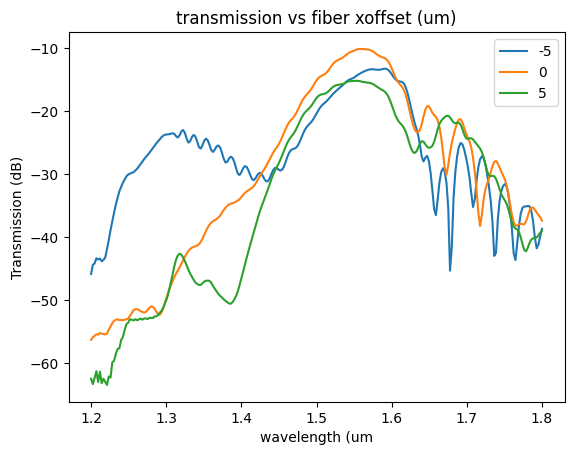

In [42]:
for offset in offsets:
    sp = gt.write_sparameters_grating_coupler(
        c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=offset
    )
    plt.plot(
        sp["wavelengths"], 20 * np.log10(np.abs(sp["o2@0,o1@0"])), label=str(offset)
    )

plt.xlabel("wavelength (um")
plt.ylabel("Transmission (dB)")
plt.title("transmission vs fiber xoffset (um)")
plt.legend()

In [43]:
fiber_angles = [3, 5, 7]
dfs = [
    gt.write_sparameters_grating_coupler(
        component=c, is_3d=False, fiber_angle_deg=fiber_angle_deg
    )
    for fiber_angle_deg in fiber_angles
]

2023-02-20 17:59:35.379 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:100 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/grating_coupler_ellipti_9d85a0c6_e3ac5bee.npz')


2023-02-20 17:59:35.383 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:100 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/grating_coupler_ellipti_9d85a0c6_cbcef604.npz')


2023-02-20 17:59:35.387 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:100 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/grating_coupler_ellipti_9d85a0c6_0b6befc7.npz')


2023-02-20 17:59:35.413 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:100 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/grating_coupler_ellipti_9d85a0c6_e3ac5bee.npz')


2023-02-20 17:59:35.429 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:100 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/grating_coupler_ellipti_9d85a0c6_cbcef604.npz')


2023-02-20 17:59:35.433 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:100 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/grating_coupler_ellipti_9d85a0c6_0b6befc7.npz')


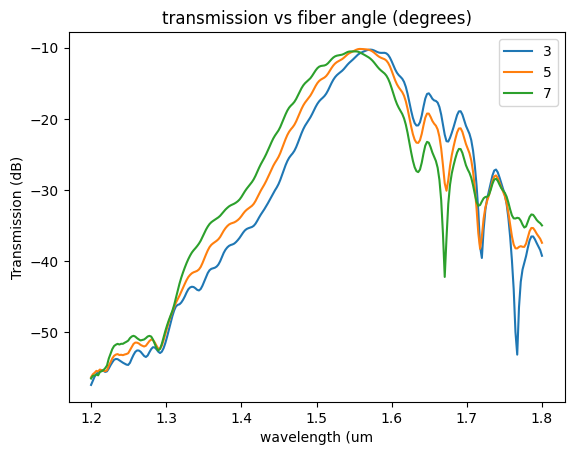

In [44]:
for fiber_angle_deg in fiber_angles:
    sp = gt.write_sparameters_grating_coupler(
        c, is_3d=False, fiber_angle_deg=fiber_angle_deg
    )
    plt.plot(
        sp["wavelengths"],
        20 * np.log10(np.abs(sp["o2@0,o1@0"])),
        label=str(fiber_angle_deg),
    )

plt.xlabel("wavelength (um")
plt.ylabel("Transmission (dB)")
plt.title("transmission vs fiber angle (degrees)")
plt.legend()

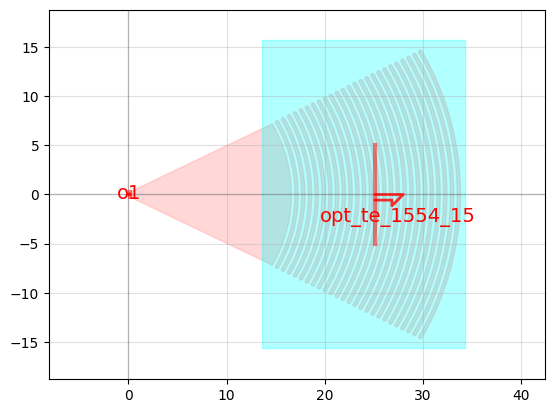

In [45]:
c = gf.components.grating_coupler_elliptical_arbitrary(
    widths=[0.343] * 25, gaps=[0.345] * 25
)
f = c.plot()

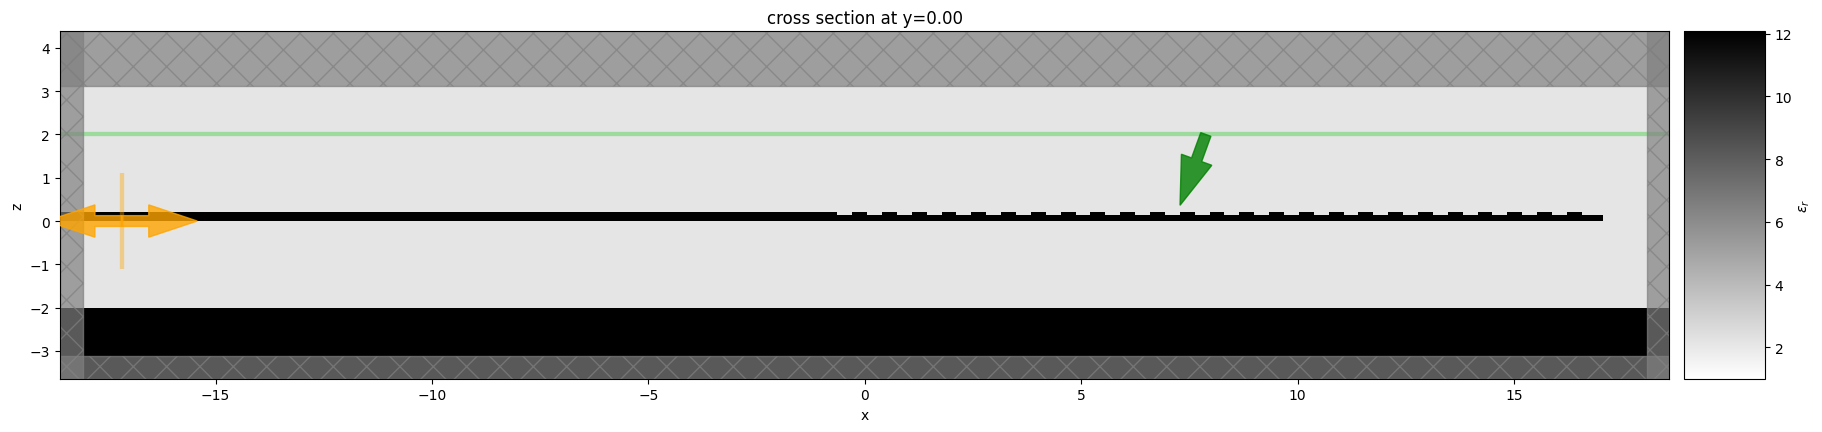

In [46]:
fiber_angle_deg = 20
sim = gt.get_simulation_grating_coupler(
    c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=0
)
f = gt.plot_simulation(sim, figsize=(22, 8))

In [47]:
offsets = [0]
offsets

[0]

In [48]:
dfs = [
    gt.write_sparameters_grating_coupler(
        component=c,
        is_3d=False,
        fiber_angle_deg=fiber_angle_deg,
        fiber_xoffset=fiber_xoffset,
    )
    for fiber_xoffset in offsets
]

2023-02-20 17:59:36.225 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:100 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/grating_coupler_ellipti_3efea4b2_d69e982a.npz')


2023-02-20 17:59:36.252 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:100 - Simulation loaded from PosixPath('/home/runner/.gdsfactory/sp/grating_coupler_ellipti_3efea4b2_d69e982a.npz')


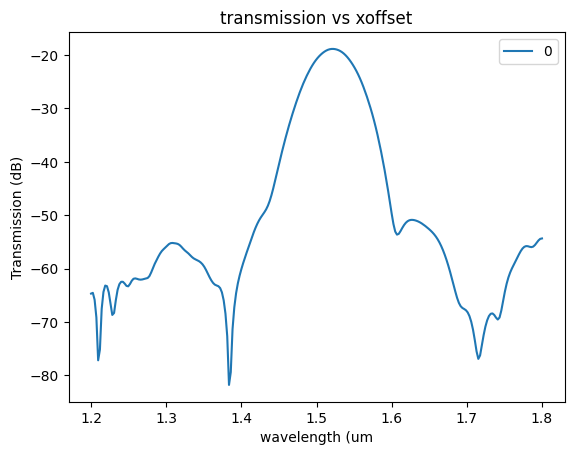

In [49]:
port_name = c.get_ports_list()[1].name

for offset in offsets:
    sp = gt.write_sparameters_grating_coupler(
        c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=offset
    )
    plt.plot(
        sp["wavelengths"],
        20 * np.log10(np.abs(sp[f"{port_name}@0,o1@0"])),
        label=str(offset),
    )

plt.xlabel("wavelength (um")
plt.ylabel("Transmission (dB)")
plt.title("transmission vs xoffset")
plt.legend()